# VARMALiNGAM

## Import and settings
In this example, we need to import `numpy`, `pandas`, and `graphviz` in addition to `lingam`.

In [1]:
import numpy as np
import pandas as pd
import graphviz
import lingam
from lingam.utils import make_dot, print_causal_directions, print_dagc

import warnings
warnings.filterwarnings('ignore')

print([np.__version__, pd.__version__, graphviz.__version__, lingam.__version__])

np.set_printoptions(precision=3, suppress=True)
np.random.seed(0)

['1.17.2', '0.25.1', '0.14', '1.2.1']


## Test data
We create test data consisting of 5 variables.

In [2]:
psi0 = np.array([
    [ 0.  ,  0.  , -0.25,  0.  ,  0.  ],
    [-0.38,  0.  ,  0.14,  0.  ,  0.  ],
    [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
    [ 0.44, -0.2 , -0.09,  0.  ,  0.  ],
    [ 0.07, -0.06,  0.  ,  0.07,  0.  ]
])
phi1 = np.array([
    [-0.04, -0.29, -0.26,  0.14,  0.47],
    [-0.42,  0.2 ,  0.1 ,  0.24,  0.25],
    [-0.25,  0.18, -0.06,  0.15,  0.18],
    [ 0.22,  0.39,  0.08,  0.12, -0.37],
    [-0.43,  0.09, -0.23,  0.16,  0.25]
])
theta1 = np.array([
    [ 0.15, -0.02, -0.3 , -0.2 ,  0.21],
    [ 0.32,  0.12, -0.11,  0.03,  0.42],
    [-0.07, -0.5 ,  0.03, -0.27, -0.21],
    [-0.17,  0.35,  0.25,  0.24, -0.25],
    [ 0.09,  0.4 ,  0.41,  0.24, -0.31]
])
causal_order = [2, 0, 1, 3, 4]

# data generated from psi0 and phi1 and theta1, causal_order
X = np.loadtxt('data/sample_data_varma_lingam.csv', delimiter=',')

## Causal Discovery
To run causal discovery, we create a `VARMALiNGAM` object and call the `fit` method.

In [3]:
model = lingam.VARMALiNGAM(order=(1, 1), criterion=None)
model.fit(X)

Using the `causal_order_` properties, we can see the causal ordering as a result of the causal discovery.

In [4]:
model.causal_order_

[2, 0, 1, 3, 4]

Also, using the `adjacency_matrices_` properties, we can see the adjacency matrix as a result of the causal discovery.

In [5]:
# psi0
model.adjacency_matrices_[0][0]

array([[ 0.   ,  0.   , -0.238,  0.   ,  0.   ],
       [-0.392,  0.   ,  0.182,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.523, -0.149,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ]])

In [6]:
# psi1
model.adjacency_matrices_[0][1]

array([[-0.145, -0.289, -0.418,  0.041,  0.592],
       [-0.323,  0.027,  0.025,  0.232,  0.378],
       [-0.249,  0.19 , -0.012,  0.134,  0.263],
       [ 0.181,  0.698,  0.21 ,  0.196, -0.814],
       [-0.487,  0.064, -0.264,  0.111,  0.26 ]])

In [7]:
# omega0
model.adjacency_matrices_[1][0]

array([[ 0.247, -0.12 , -0.129, -0.124,  0.037],
       [ 0.377,  0.318, -0.121, -0.024,  0.574],
       [-0.106, -0.624,  0.015, -0.301, -0.247],
       [-0.219,  0.26 ,  0.313,  0.228, -0.058],
       [ 0.256,  0.404,  0.411,  0.257, -0.287]])

We can draw a causal graph by utility funciton

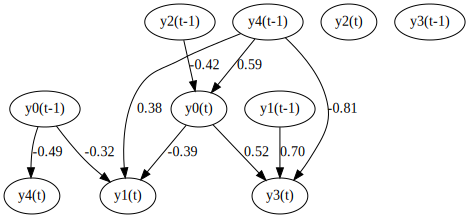

In [8]:
labels = ['y0(t)', 'y1(t)', 'y2(t)', 'y3(t)', 'y4(t)', 'y0(t-1)', 'y1(t-1)', 'y2(t-1)', 'y3(t-1)', 'y4(t-1)']
make_dot(np.hstack(model.adjacency_matrices_[0]), lower_limit=0.3, ignore_shape=True, labels=labels)

## Bootstrap

### Bootstrapping
We call `bootstrap()` method instead of `fit()`. Here, the second argument specifies the number of bootstrap sampling.

In [9]:
model = lingam.VARMALiNGAM()
result = model.bootstrap(X, 100)

Since `BootstrapResult` object is returned, we can get the ranking of the causal directions extracted by `get_causal_direction_counts()` method. In the following sample code, `n_directions` option is limited to the causal directions of the top 8 rankings, and `min_causal_effect` option is limited to causal directions with a coefficient of 0.4 or more.

In [10]:
cdc = result.get_causal_direction_counts(n_directions=8, min_causal_effect=0.4, split_by_causal_effect_sign=True)

We can check the result by utility function.

In [11]:
labels = ['y0(t)', 'y1(t)', 'y2(t)', 'y3(t)', 'y4(t)', 'y0(t-1)', 'y1(t-1)', 'y2(t-1)', 'y3(t-1)', 'y4(t-1)', 'e0(t-1)', 'e1(t-1)', 'e2(t-1)', 'e3(t-1)', 'e4(t-1)']
print_causal_directions(cdc, 100, labels=labels)

y4(t) <--- y0(t-1) (b<0) (100.0%)
y2(t) <--- e1(t-1) (b<0) (100.0%)
y0(t) <--- y2(t-1) (b<0) (99.0%)
y3(t) <--- y1(t-1) (b>0) (95.0%)
y1(t) <--- e4(t-1) (b>0) (80.0%)
y0(t) <--- y4(t-1) (b>0) (75.0%)
y4(t) <--- y4(t-1) (b>0) (68.0%)
y3(t) <--- y2(t) (b<0) (51.0%)


Also, using the `get_directed_acyclic_graph_counts()` method, we can get the ranking of the DAGs extracted. In the following sample code, `n_dags` option is limited to the dags of the top 3 rankings, and `min_causal_effect` option is limited to causal directions with a coefficient of 0.3 or more.

In [12]:
dagc = result.get_directed_acyclic_graph_counts(n_dags=3, min_causal_effect=0.3, split_by_causal_effect_sign=True)

We can check the result by utility function.

In [13]:
print_dagc(dagc, 100, labels=labels)

DAG[0]: 5.0%
	y0(t) <--- y3(t) (b<0)
	y0(t) <--- y2(t-1) (b<0)
	y0(t) <--- y4(t-1) (b>0)
	y1(t) <--- y0(t-1) (b<0)
	y1(t) <--- e4(t-1) (b>0)
	y2(t) <--- y3(t) (b<0)
	y2(t) <--- y1(t-1) (b>0)
	y2(t) <--- e1(t-1) (b<0)
	y3(t) <--- y1(t-1) (b>0)
	y3(t) <--- y4(t-1) (b<0)
	y4(t) <--- y3(t) (b>0)
	y4(t) <--- y0(t-1) (b<0)
	y4(t) <--- y2(t-1) (b<0)
	y4(t) <--- y4(t-1) (b>0)
	y4(t) <--- e2(t-1) (b>0)
	y4(t) <--- e4(t-1) (b<0)
DAG[1]: 3.0%
	y0(t) <--- y1(t-1) (b<0)
	y0(t) <--- y2(t-1) (b<0)
	y0(t) <--- y4(t-1) (b>0)
	y1(t) <--- y0(t-1) (b<0)
	y1(t) <--- e4(t-1) (b>0)
	y2(t) <--- y0(t-1) (b<0)
	y2(t) <--- y4(t-1) (b>0)
	y2(t) <--- e1(t-1) (b<0)
	y2(t) <--- e3(t-1) (b<0)
	y3(t) <--- y0(t) (b<0)
	y3(t) <--- y1(t) (b<0)
	y3(t) <--- y2(t) (b<0)
	y3(t) <--- y1(t-1) (b>0)
	y3(t) <--- y3(t-1) (b>0)
	y4(t) <--- y3(t) (b>0)
	y4(t) <--- y0(t-1) (b<0)
	y4(t) <--- y2(t-1) (b<0)
	y4(t) <--- y4(t-1) (b>0)
	y4(t) <--- e2(t-1) (b>0)
	y4(t) <--- e4(t-1) (b<0)
DAG[2]: 3.0%
	y0(t) <--- y3(t) (b<0)
	y0(t) <--- y2(

Using the `get_probabilities()` method, we can get the probability of bootstrapping.

In [14]:
prob = result.get_probabilities(min_causal_effect=0.1)
print('Probability of psi0:\n', prob[0])
print('Probability of psi1:\n', prob[1])
print('Probability of omega1:\n', prob[2])

Probability of psi0:
 [[0.   0.07 0.69 0.69 0.25]
 [0.05 0.   0.37 0.43 0.  ]
 [0.18 0.63 0.   0.45 0.05]
 [0.31 0.57 0.55 0.   0.  ]
 [0.09 1.   0.01 1.   0.  ]]
Probability of psi1:
 [[0.39 0.86 1.   0.33 1.  ]
 [1.   1.   1.   1.   0.94]
 [1.   1.   0.01 1.   0.99]
 [0.44 1.   0.3  1.   1.  ]
 [1.   0.96 1.   0.   1.  ]]
Probability of omega1:
 [[1.   0.06 0.31 0.02 0.01]
 [1.   0.63 0.   0.37 1.  ]
 [0.32 1.   0.08 1.   0.92]
 [0.29 0.45 1.   0.46 0.16]
 [1.   1.   1.   1.   1.  ]]
